
## Supervised classification - improving capacity learning
<hr>

## 0. Import library
<hr>
Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

import math


## 1. Load and plot the dataset (dataset-noise-01.txt)
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$.

The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.

You may use matplotlib function `scatter(x,y)`.

Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


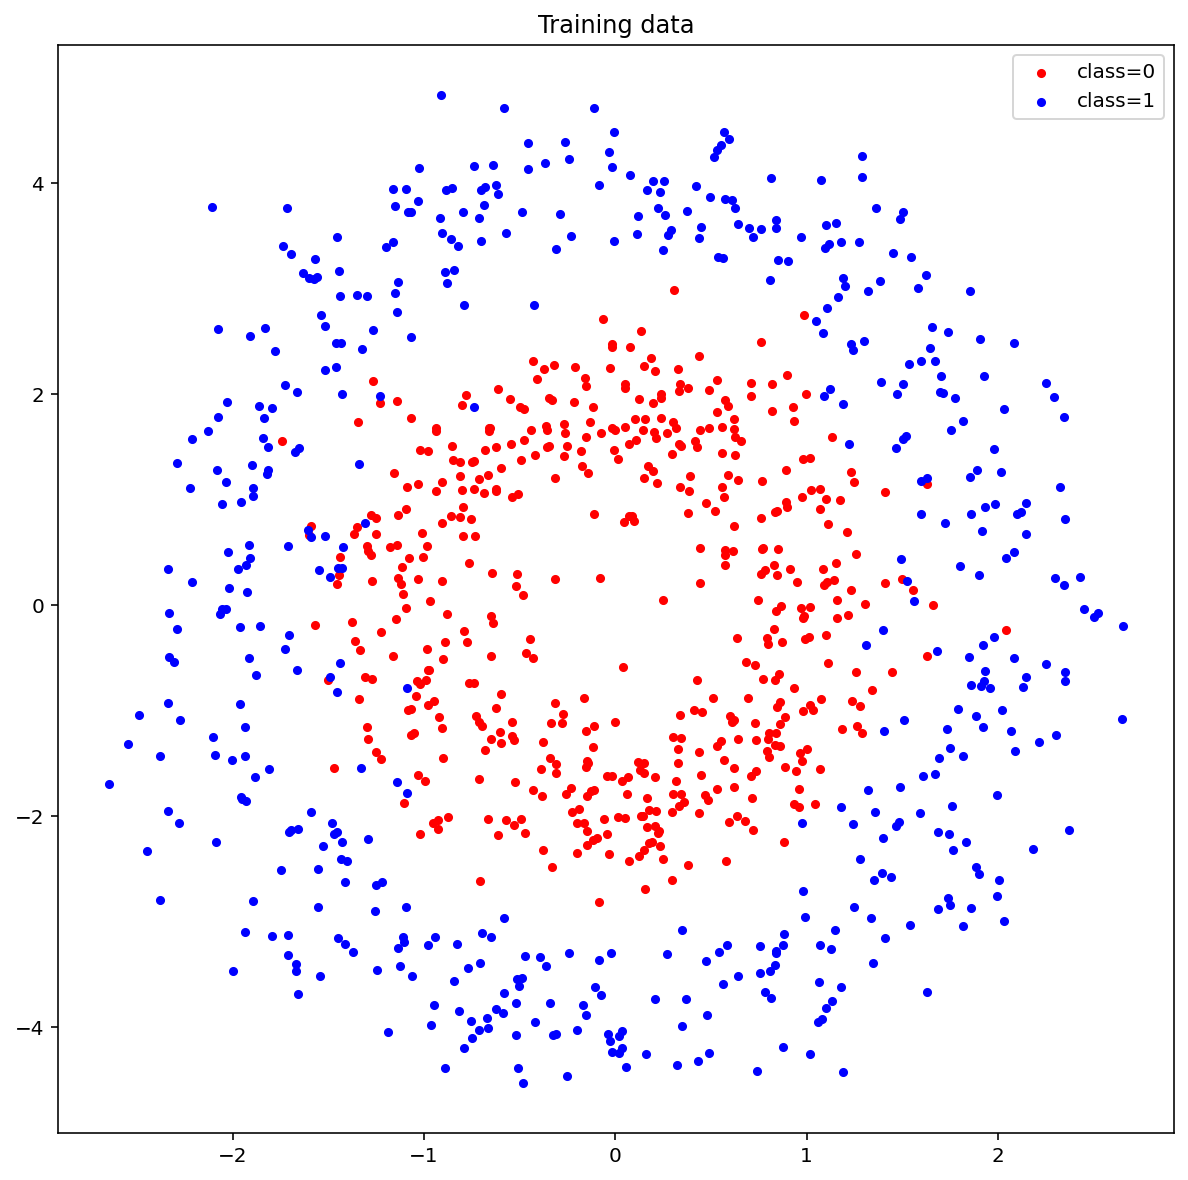

In [27]:
# import data with numpy
data = np.loadtxt('dataset-a.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label

idx_class0 =(idx==0)  # index of class0
idx_class1 =(idx==1)  # index of class1

plt.figure(1,figsize=(10,10))
plt.scatter( x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()


In [3]:
# import data with numpy
data = np.loadtxt('dataset-a.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of the data = {}'.format(n))
print('Shape of the data = {}'.format(data.shape))
print('Data type of the data = {}'.format(data.dtype))

x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx = data[:,2] # label


Number of the data = 1000
Shape of the data = (1000, 3)
Data type of the data = float64


## 2. Define a logistic regression loss function and its gradient
<hr>

In [6]:
# sigmoid function
def sigmoid(z):
    sigmoid_f =1/(1+np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(np.dot(X,w))
    return p


# loss function definition
def loss_logreg(y_pred,y): 
    loss=-y*np.log(y_pred)-(1-y)*np.log(1-y_pred)
    return np.mean(loss)


# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad =  np.dot(X.T,(y_pred-y))/n*2
    return grad


# gradient descent function definition
def grad_desc(X, y , w_init, tau, max_iter):

    L_iters = np.zeros([max_iter]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function   
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss  
        w =  w - tau* grad_f # update rule of gradient descent  
        L_iters[i] =  loss_logreg(y_pred,y)# save the current loss value 
        
    return w, L_iters

## 3. define a prediction function and run a gradient descent algorithm
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

The prediction function can be defined in terms of the following feature functions $f_i$ as follows:

$$
X = 
\left[ 
\begin{array}{cccccc}
f_0(x_1) & f_1(x_1) & f_2(x_1) & f_3(x_1) & f_4(x_1) & f_5(x_1) & f_6(x_1) & f_7(x_1) & f_8(x_1) & f_9(x_1) \\
f_0(x_2) & f_1(x_2) & f_2(x_2) & f_3(x_2) & f_4(x_2) & f_5(x_2) & f_6(x_2) & f_7(x_2) & f_8(x_2) & f_9(x_2) \\
\vdots\\
f_0(x_n) & f_1(x_n) & f_2(x_n) & f_3(x_n) & f_4(x_n) & f_5(x_n) & f_6(x_n) & f_7(x_n) & f_8(x_n) & f_9(x_n) \\
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2 \\ 
w_3 \\ 
w_4 \\ 
w_5 \\
w_6 \\ 
w_7 \\ 
w_8 \\ 
w_9
\end{array} 
\right]
\quad
$$

where $x_i = (x_i(1), x_i(2))$ and you can define a feature function $f_i$ as you want.

You can use at most 10 feature functions $f_i$, $i = 0, 1, 2, \cdots, 9$ in such a way that the classification accuracy is maximized. You are allowed to use less than 10 feature functions.

Implement the logistic regression function with gradient descent using a vectorization scheme.

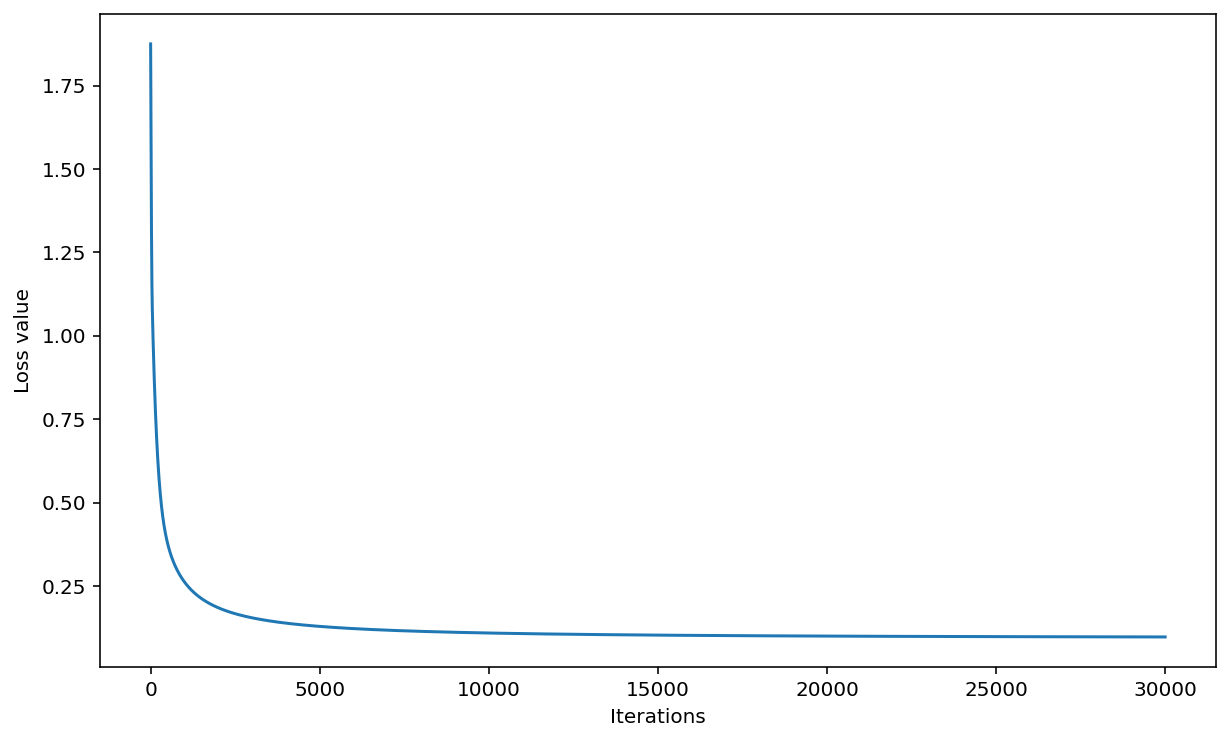

In [28]:
import math
# construct the data matrix X, and label vector y
n = data.shape[0] #1000
X = np.ones([n,6])
X[:,1]=x1
X[:,2]=x2
X[:,3]=x1*x1
X[:,4]=x1*x2
X[:,5]=x2*x2

y = data[:,2][:,None] # label 


# run gradient descent algorithm
start = time.time()
w_init = np.array([1,1,1,1,1,1])[:,None]
tau = 1e-2; max_iter = 30000
w, L_iters = grad_desc(X,y,w_init,tau,max_iter )

# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 4. Plot the decisoin boundary
<hr>

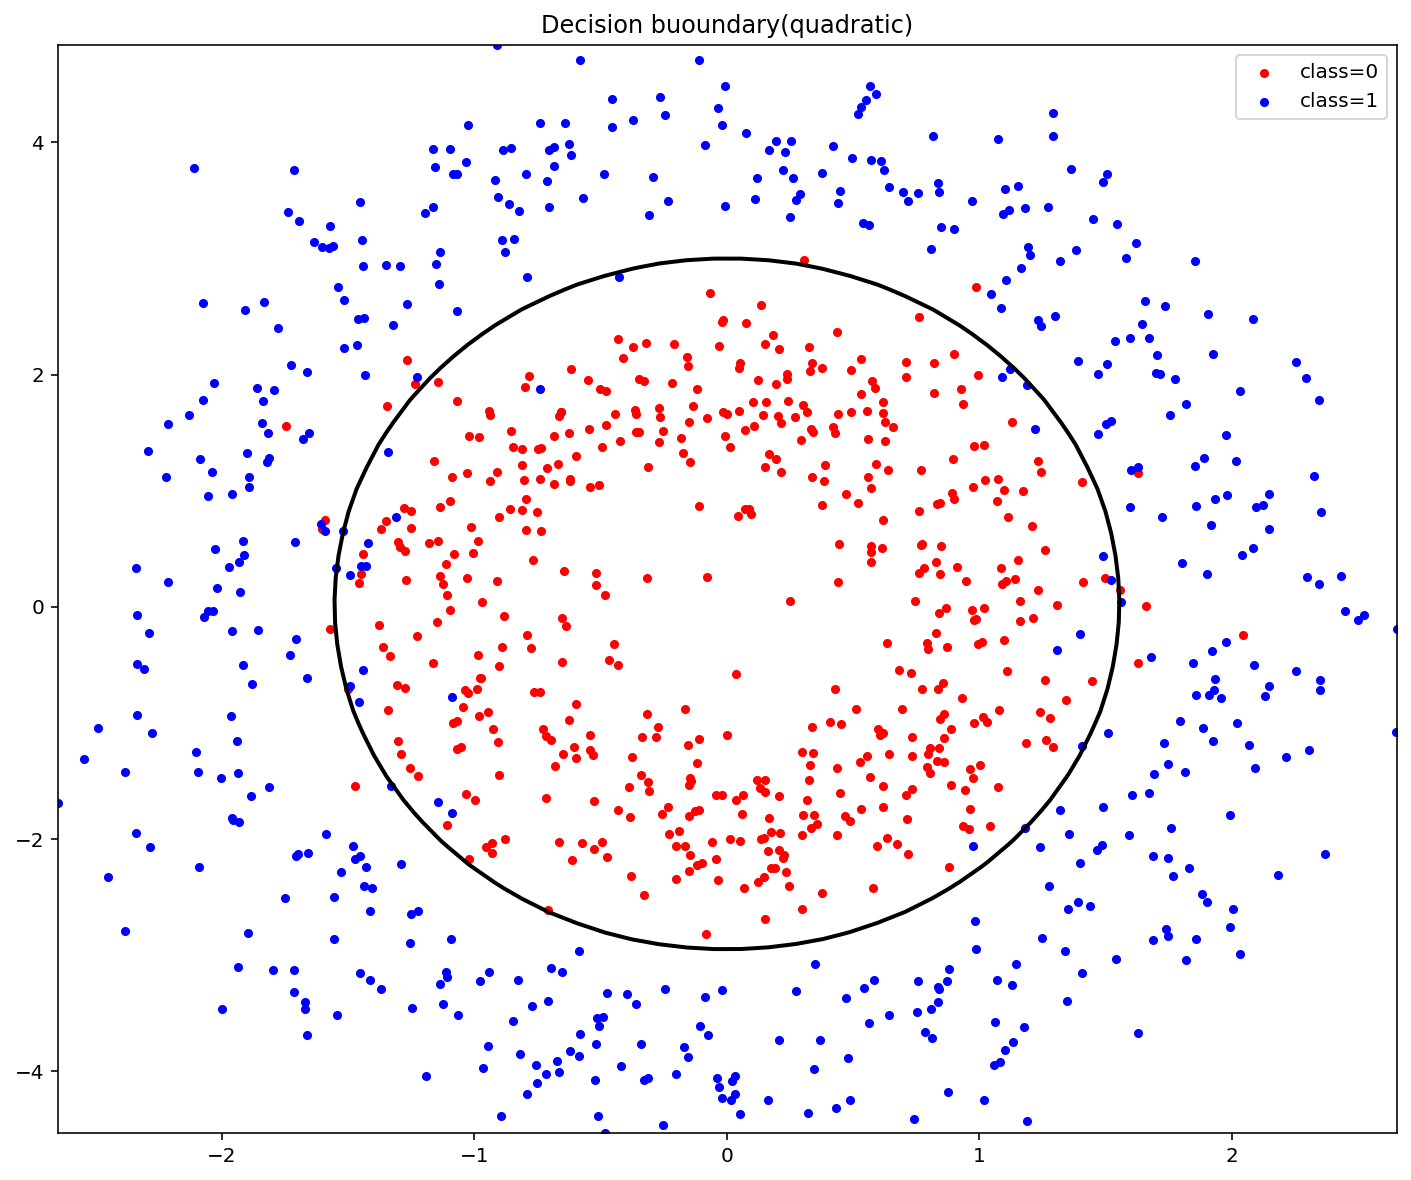

In [43]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max() # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))  # create meshgrid
x1_1=xx1.reshape(-1)
x2_1=xx2.reshape(-1)
X2 = np.ones([2500,6])
X2[:,1]=x1_1
X2[:,2]=x2_1
X2[:,3]=x1_1*x1_1
X2[:,4]=x1_1*x2_1
X2[:,5]=x2_1*x2_1

p = f_pred(X2,w)
p = p.reshape(50,50)

# plot
plt.figure(4,figsize=(12,10))

#ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
#cbar = plt.colorbar(ax)
#cbar.update_ticks()

plt.scatter( x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, levels=[0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision buoundary(quadratic)')
plt.show()

In [42]:
x1_min, x1_max = x1.min(), x1.max() # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))  # create meshgrid
x1_1=xx1.reshape(-1)
x2_1=xx2.reshape(-1)
X2 = np.ones([2500,6])
X2[:,1]=x1_1
X2[:,2]=x2_1
X2[:,3]=x1_1*x1_1
X2[:,4]=x1_1*x2_1
X2[:,5]=x2_1*x2_1

## 5. Plot the probability map
<hr>

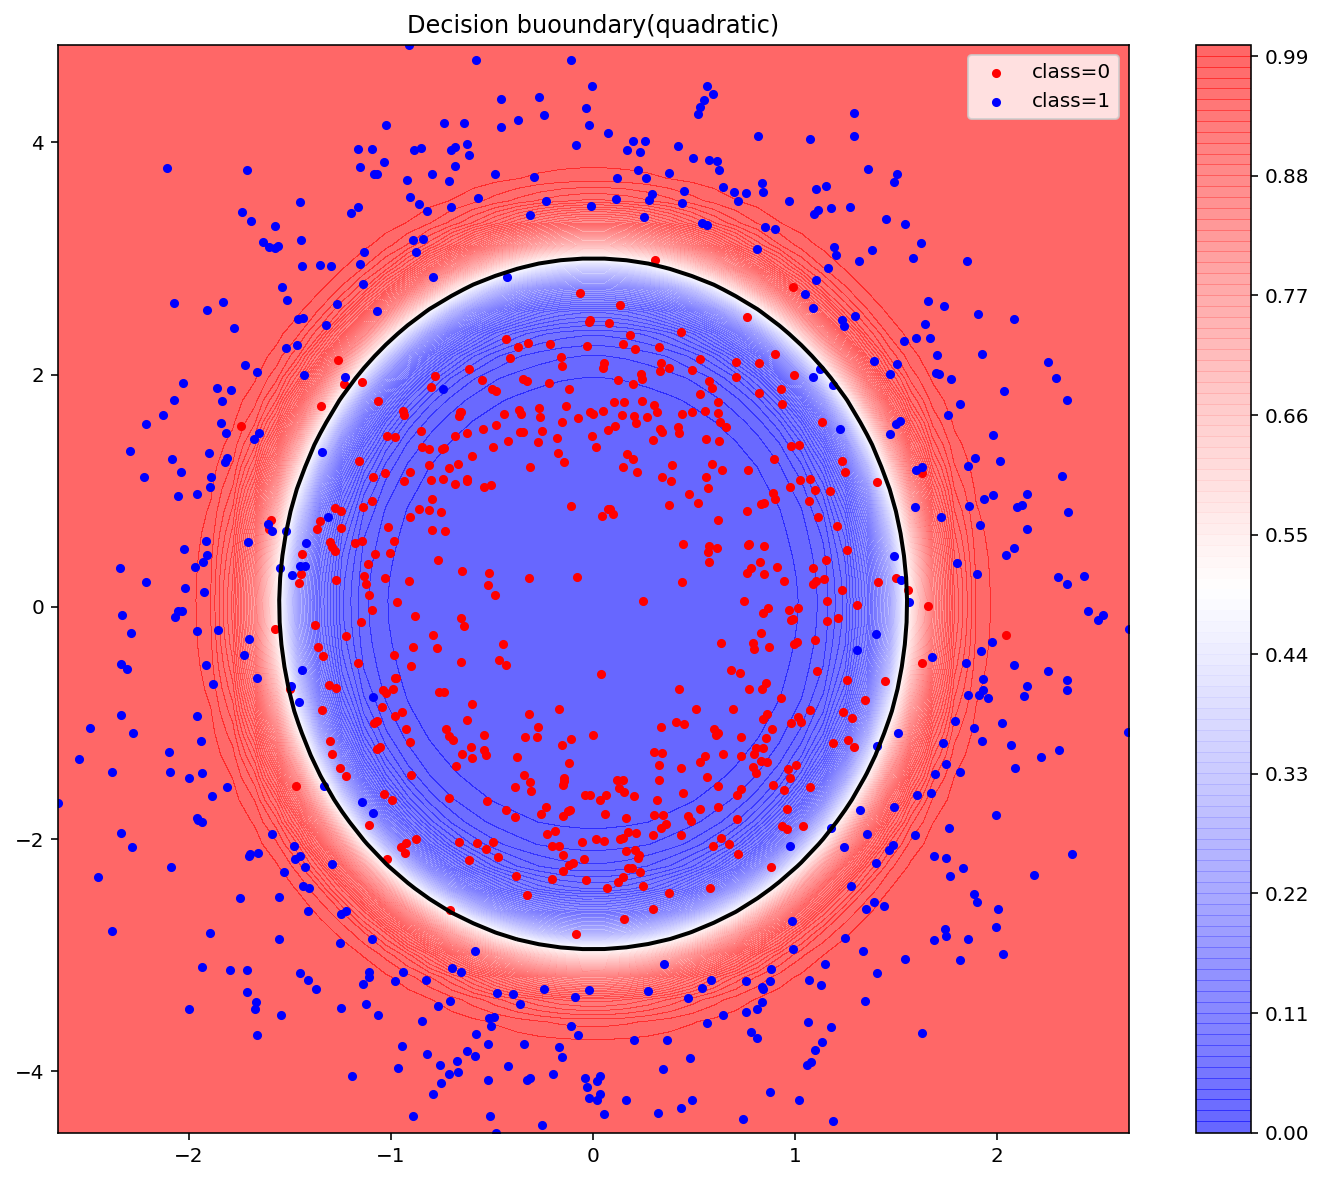

In [46]:
# compute values p(x) for multiple data points x
x1_min, x1_max = x1.min(), x1.max() # min and max of grade 1
x2_min, x2_max = x2.min(), x2.max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))  # create meshgrid
x1_1=xx1.reshape(-1)
x2_1=xx2.reshape(-1)
X2 = np.ones([2500,6])
X2[:,1]=x1_1
X2[:,2]=x2_1
X2[:,3]=x1_1*x1_1
X2[:,4]=x1_1*x2_1
X2[:,5]=x2_1*x2_1

p = f_pred(X2,w)
p = p.reshape(50,50)

# plot
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='bwr', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter( x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, levels=[0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision buoundary(quadratic)')
plt.show()

## 6. Compute the classification accuracy
<hr>

### The accuracy is computed by:

$$
\textrm{accuracy} = \frac{\textrm{number of correctly classified data}}{\textrm{total number of data}}
$$

In [14]:
# compute the accuracy of the classifier
n = data.shape[0]

# plot
# x1 = x1  # feature 1
# x2 =   # feature 2
# idx_class0 =   # index of class0
# idx_class1 =   # index of class1
 
y_pred = f_pred(X,w )

idx_class1_pred = (y_pred>0.5 )

#print(idx_class1_label)
#print(idx_class1_pred)

idx_wrong = ( )

#print(np.sum(idx_wrong))
print('total number of correctly classified data = ', )
print('accuracy(%) = ',  )

total number of data = 1000
total number of correctly classified data =  959
accuracy(%) =  95.89999999999999


In [65]:
y_pred = f_pred(X,w )
y_pred
idx_class1_pred = (y_pred>0.5 ).reshape(-1)
acc=idx_class1_pred==idx_class1
acc.sum()

959

## Output using the dataset (dataset-noise-01.txt)
<hr>

## 1. Visualize the data [1pt]
<ht>

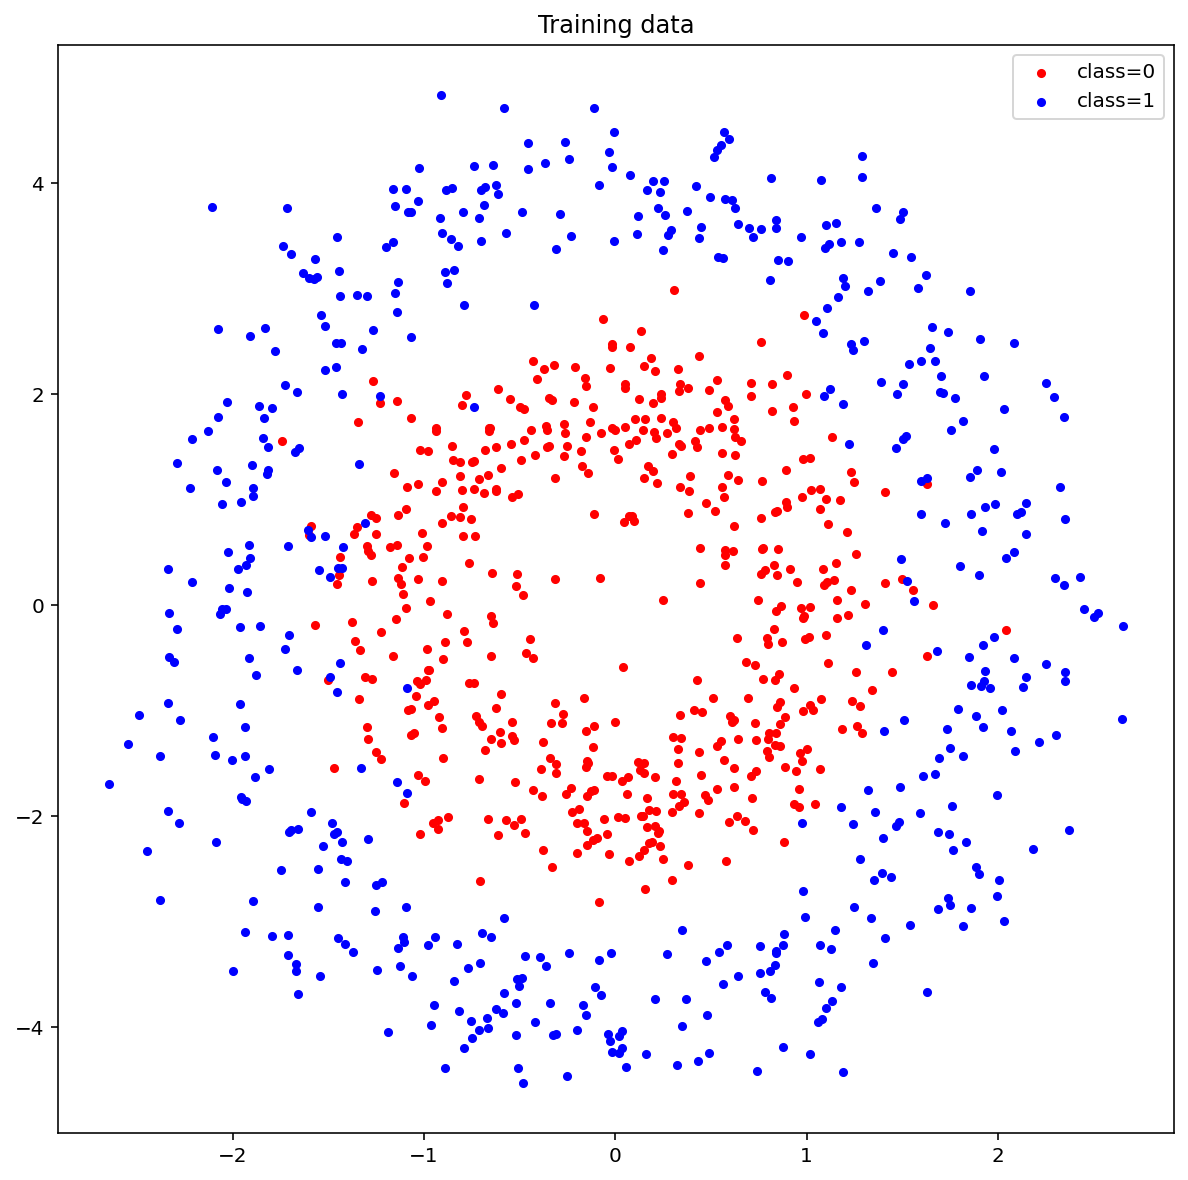

In [9]:
plt.figure(1,figsize=(10,10))
plt.scatter( x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.title('Training data')
plt.legend()
plt.show()

## 2. Plot the loss curve obtained by the gradient descent until the convergence [2pt]
<hr>

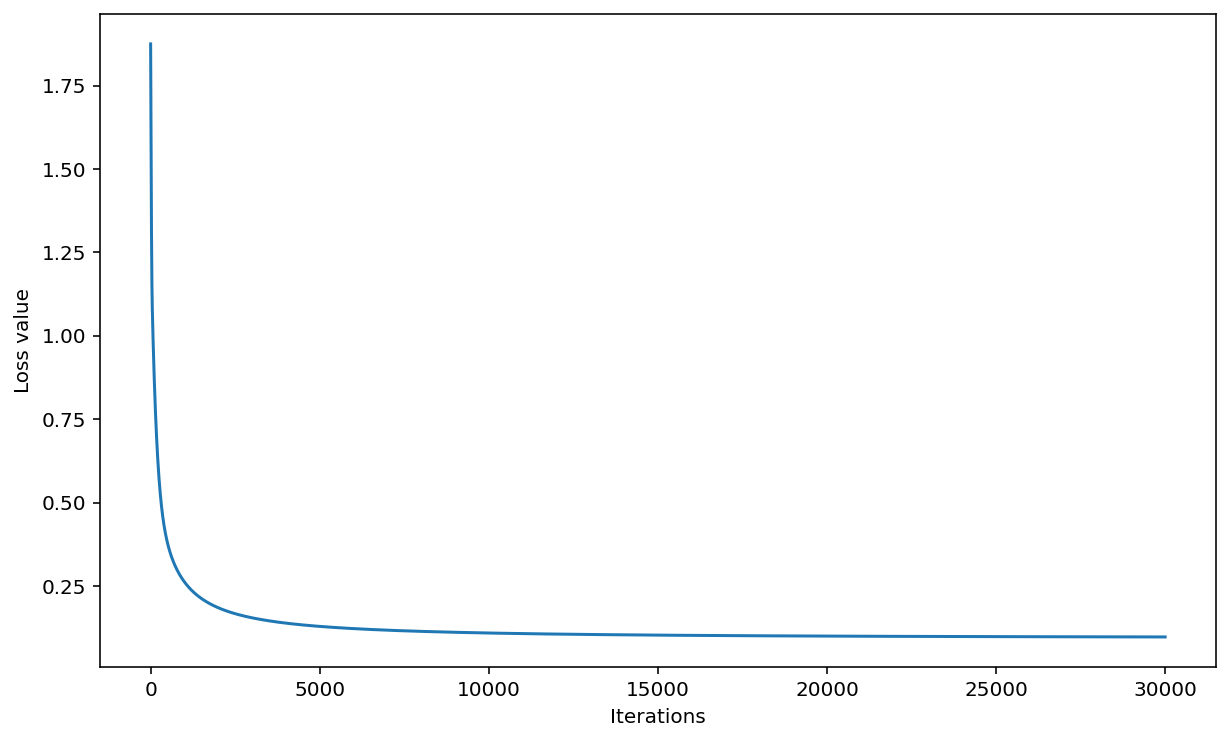

In [29]:
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

## 3. Plot the decisoin boundary of the obtained classifier [2pt]
<hr>

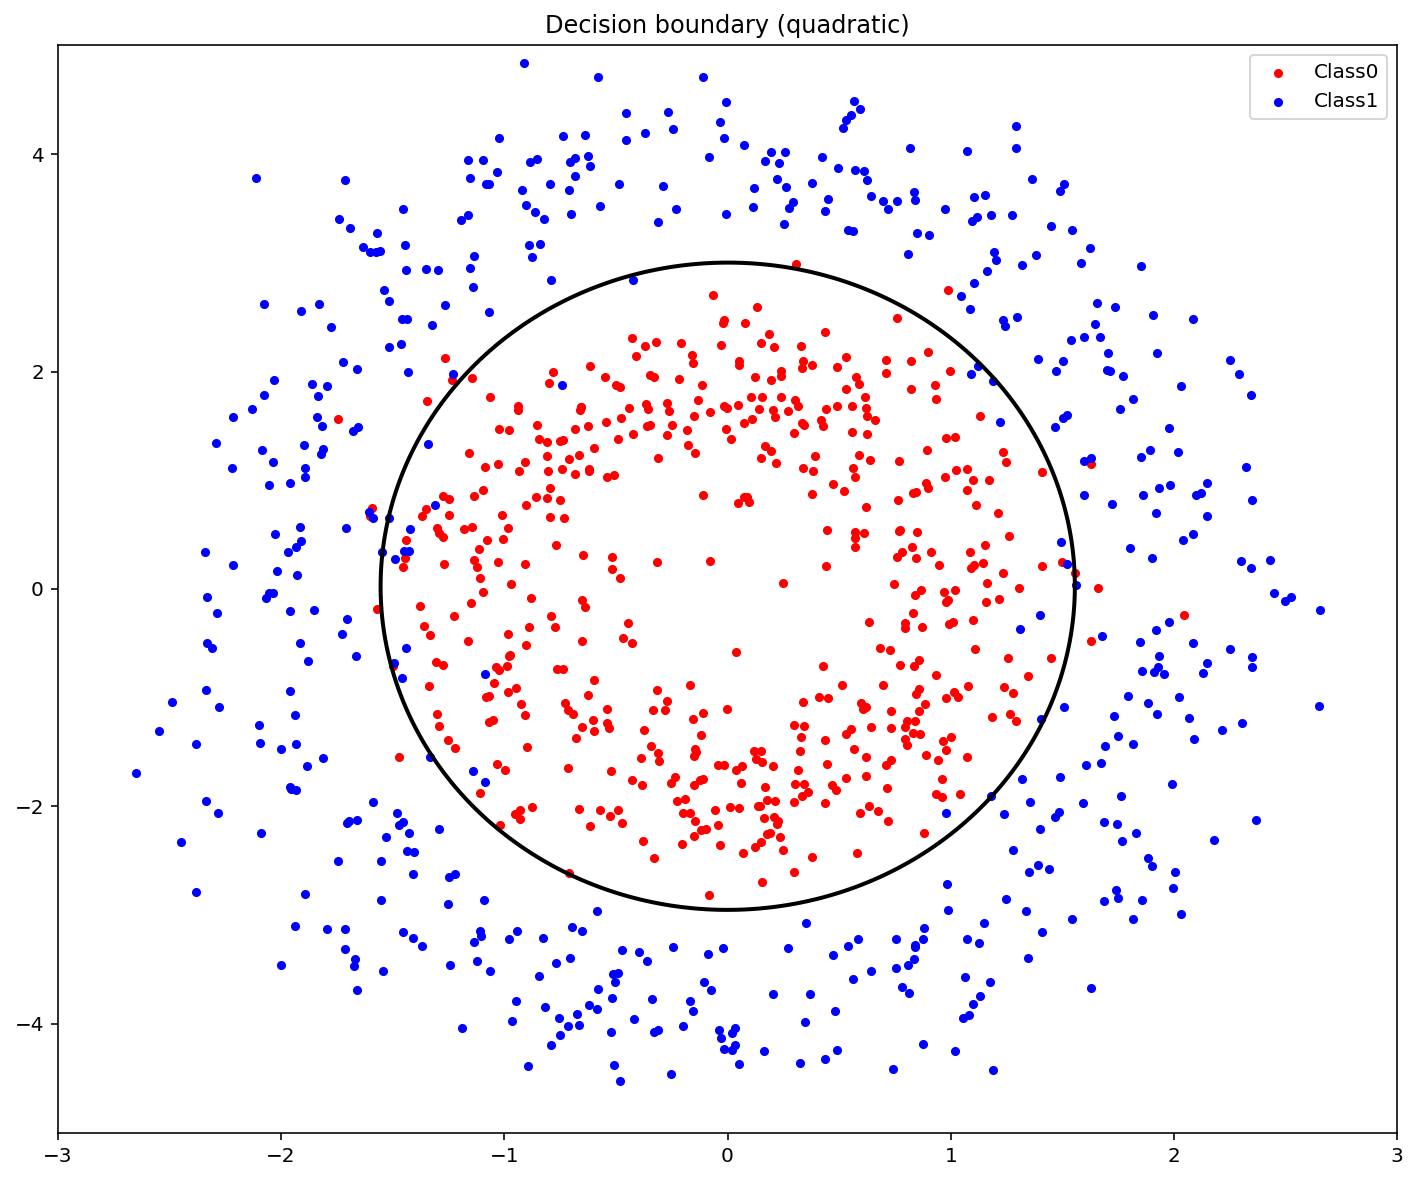

In [20]:
plt.figure(4,figsize=(12,10))

plt.scatter( x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, levels=[0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision buoundary(quadratic)')
plt.show()

## 4. Plot the probability map of the obtained classifier [2pt]
<hr>

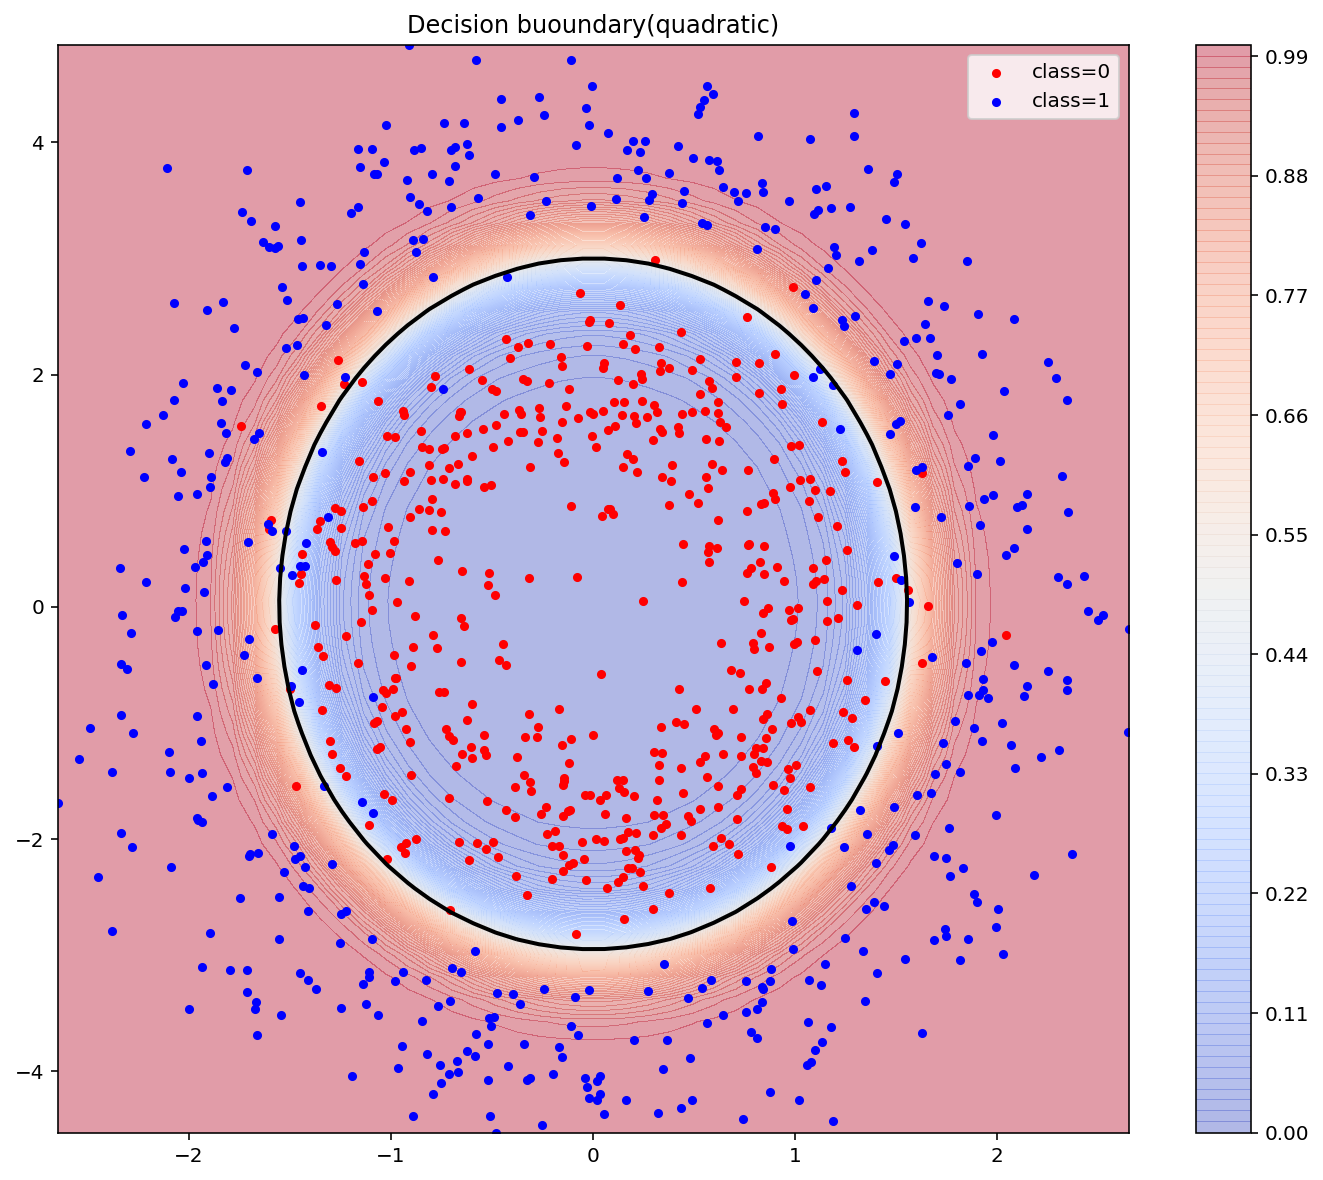

In [47]:
plt.figure(4,figsize=(12,10))

ax = plt.contourf(xx1,xx2,p,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.4)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter( x1[idx_class0], x2[idx_class0], s=50, c='r', marker='.', label='class=0') 
plt.scatter(x1[idx_class1], x2[idx_class1] , s=50, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, p, levels=[0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision buoundary(quadratic)')
plt.show()

## 5. Compute the classification accuracy [1pt]
<hr>

total number of data = 1000
total number of correctly classified data =  959
accuracy(%) =  95.89999999999999
